In [50]:
# import packages 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns 


# Overview of the Data 


In [121]:
# read csv file 

heart_df = pd.read_csv("cardio_train.csv", delimiter =";")
heart_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [122]:
heart_df.describe() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<div class="alert alert-block alert-info">

Befor we delve into the data here is a quick overview of what we are going to be dealing with. 

This data set about peoples cardiovascular health and it contains 13 features as listed below. 

`id (int):` the patient's number.

`age (int - days):` the patient's age in days.

`gender (categorical code):` 1: women, 2: man.

`height (int - cm):` height of the patient.

`weight (float - kg):` weight of the patient.

`ap_hi (int):` Systolic blood pressure

`ap_lo (int):` Diastolic blood pressure

`cholesterol (categorical code):` Cholesterol level - 1: normal, 2: above normal, 3: well above normal 

`gluc (categorical code):` Glucose level - 1: normal, 2: above normal, 3: well above normal 

`smoke (binary):` Whether patient smokes or not - 0: Doesn't smoke, 1: Smokes

`alco (binary):` Whether patient takes alcohol or not - 0: Doesn't drink, 1: Drinks 

`active (binary):` Whether patient does physical activity (PE) - 0: Doesn't do PE, 1: Does PE

`cardio (binary):` Presence or absence of cardiovascular disease - 0: Presence of cardiovascular disease, 1: Absence of cardiovascular disease 



</div>

<div class="alert alert-block alert-info">

| Column Name       | Description                                                   | Data Type     |
| ----------------- | ------------------------------------------------------------- | ------------- |
| id                | Subject's id number                                           | int           |
| age               | Subject's age in days                                         | int           |
| gender            | Subject's gender (categorical code)                           | int           | 
| height            | Subject's height in cm                                        | int           |
| weight            | Subject's weight in kg                                        | int           |
| ap_hi             | Subject's Systolic blood pressure                             | int           |
| ap_lo             | Subject's Diastolic blood pressure                            | int           |
| cholesterol       | Subject's Cholesterol level (categorical code)                | int           |
| gluc              | Subject's Glucose level (categorical code)                    | int           |
| smoke             | Whether subject smokes or not (binary value)                  | int           | 
| alco              | Whether subject drinks or not (binary value)                  | int           |
| active            | Whether subject does PE or not (binary value)                 | int           |
| cardio            | Presence or absence of cardiovascular disease (binary value)  | int           |                          





</div>

In [123]:
heart_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


##### There is no missing value in this data set.

# Fix Data 



#### Change the subject's age from days to years 


In [124]:
average_days_per_year = 365.25

heart_df['age'] = (heart_df['age']/ average_days_per_year).round().astype(int)

heart_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


#### Change categorical data type into categorical


In [125]:
# Categorical variables
heart_df[['gender', 'cholesterol', 'gluc']] = heart_df[['gender', 'cholesterol', 'gluc']].astype('category')

# Boolean variables
heart_df[['smoke', 'alco', 'active', 'cardio']] = heart_df[['smoke', 'alco', 'active', 'cardio']].astype('boolean')


heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           70000 non-null  int64   
 1   age          70000 non-null  int64   
 2   gender       70000 non-null  category
 3   height       70000 non-null  int64   
 4   weight       70000 non-null  float64 
 5   ap_hi        70000 non-null  int64   
 6   ap_lo        70000 non-null  int64   
 7   cholesterol  70000 non-null  category
 8   gluc         70000 non-null  category
 9   smoke        70000 non-null  boolean 
 10  alco         70000 non-null  boolean 
 11  active       70000 non-null  boolean 
 12  cardio       70000 non-null  boolean 
dtypes: boolean(4), category(3), float64(1), int64(5)
memory usage: 3.9 MB


In [126]:
heart_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,False,False,True,False
1,1,55,1,156,85.0,140,90,3,1,False,False,True,True
2,2,52,1,165,64.0,130,70,3,1,False,False,False,True
3,3,48,2,169,82.0,150,100,1,1,False,False,True,True
4,4,48,1,156,56.0,100,60,1,1,False,False,False,False


# Explore Variables 


### A short Exploration of each variables 

##### id 


In [127]:
print(heart_df['id'].head(20))
print(heart_df['id'].tail(20))

0      0
1      1
2      2
3      3
4      4
5      8
6      9
7     12
8     13
9     14
10    15
11    16
12    18
13    21
14    23
15    24
16    25
17    27
18    28
19    29
Name: id, dtype: int64
69980    99971
69981    99972
69982    99973
69983    99974
69984    99975
69985    99977
69986    99978
69987    99979
69988    99981
69989    99985
69990    99986
69991    99988
69992    99990
69993    99991
69994    99992
69995    99993
69996    99995
69997    99996
69998    99998
69999    99999
Name: id, dtype: int64


There is nothing to analyze in the "id" column as it most probably gives a random id number according to when a patient was checked


#### age

In [128]:

print(f'Statistical summary for the variable age: \n{heart_df['age'].describe()}\n')
age_quantiles = heart_df['age'].quantile([0.0, 0.25, 0.50, 0.75, 0.9, 0.99, 1])

print(f'Quantiles for the variable age:\n{age_quantiles}')

Statistical summary for the variable age: 
count    70000.000000
mean        53.303157
std          6.760171
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age, dtype: float64

Quantiles for the variable age:
0.00    30.0
0.25    48.0
0.50    54.0
0.75    58.0
0.90    62.0
0.99    64.0
1.00    65.0
Name: age, dtype: float64


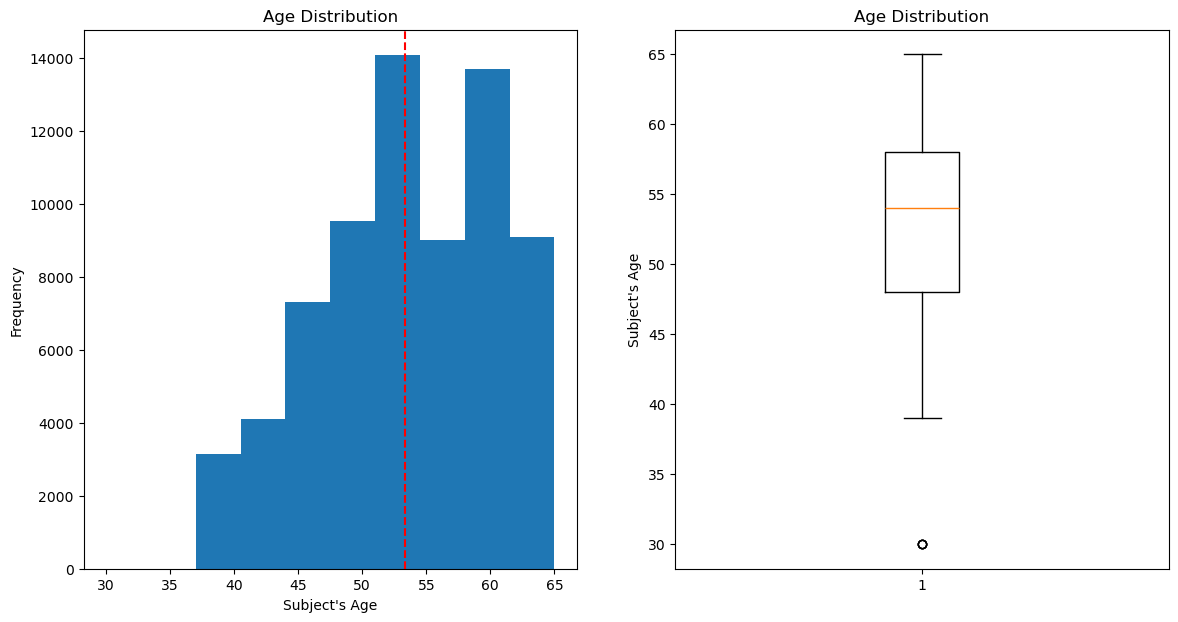

In [178]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,7))

ax[0].hist(heart_df['age'])
ax[0].set_xlabel("Subject's Age")
ax[0].axvline(x=heart_df['age'].mean(), color = 'red', linestyle = '--', linewidth = 1.5)
ax[0].set_ylabel("Frequency")
ax[0].set_title("Age Distribution")

ax[1].boxplot(heart_df['age'])
ax[1].set_ylabel("Subject's Age")
ax[1].set_title("Age Distribution")

plt.show()

From the data we see that there is one outlier and that is patients at the age of 30 

In [130]:
heart_df[heart_df['age'] == 30]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6219,8850,30,1,175,59.0,120,80,1,1,False,False,True,False
22343,31922,30,2,175,92.0,100,60,1,1,False,False,True,False
30666,43842,30,1,159,59.0,120,80,1,1,False,False,True,False
55905,79749,30,1,160,59.0,110,70,1,1,False,False,True,False


#### gender 

In [131]:
tab = pd.crosstab(index=heart_df['gender'], columns = 'count').reset_index()
tab

col_0,gender,count
0,1,45530
1,2,24470


In [132]:
x = tab['gender']
y = tab['count']


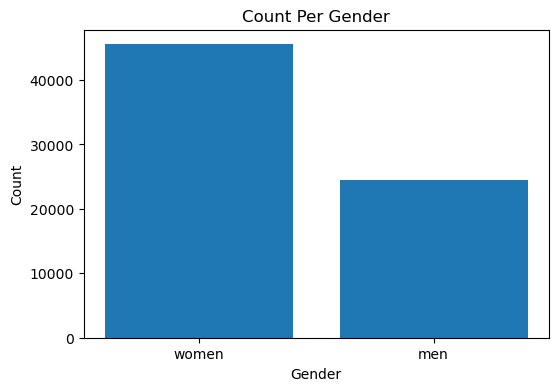

In [133]:
fig, ax = plt.subplots(figsize = (6,4))

ax.bar(x, y)

ax.set_xticks([1,2])
ax.set_xticklabels(['women', 'men'])
ax.set_xlabel("Gender")
ax.set_ylabel("Count")

ax.set_title("Count Per Gender")

plt.show()

#### height 


In [134]:
print(f"Statistical summary for the variable heigh:\n{heart_df['height'].describe()}\n")

height_quantiles = heart_df['height'].quantile([0.0, 0.25, 0.50, 0.75, 0.9, 0.99, 1])

print(f"Quantiles for the variable height:\n{height_quantiles}")

Statistical summary for the variable heigh:
count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

Quantiles for the variable height:
0.00     55.0
0.25    159.0
0.50    165.0
0.75    170.0
0.90    175.0
0.99    184.0
1.00    250.0
Name: height, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

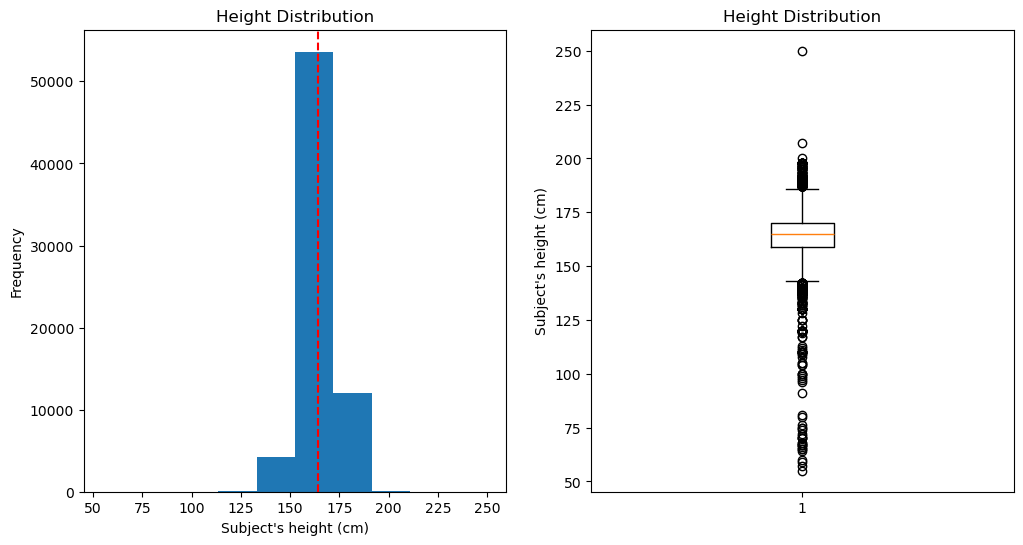

In [176]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,6))

ax[0].hist(heart_df['height'])
ax[0].set_xlabel("Subject's height (cm)")
ax[0].axvline(x=heart_df['height'].mean(), color = 'red', linestyle = '--', linewidth = 1.5)
ax[0].set_ylabel("Frequency")
ax[0].set_title("Height Distribution")



ax[1].boxplot(heart_df["height"])
ax[1].set_ylabel("Subject's height (cm)")
ax[1].set_title("Height Distribution")


plt.show

Apparently there is an outlier at 250 cm. Let's check it out 

In [136]:
heart_df[heart_df['height'] == 250]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,9223,58,1,250,86.0,140,100,3,1,False,False,True,True


#### weight

In [137]:
print(f"Statistical summary for the variable weight: {heart_df['weight'].describe()}\n")

weight_quantiles = heart_df['weight'].quantile([0.0, 0.25, 0.50, 0.75, 0.90, 0.99, 1.0])

print(f"Quantiles for the variable weight:\n{weight_quantiles}")

Statistical summary for the variable weight: count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

Quantiles for the variable weight:
0.00     10.0
0.25     65.0
0.50     72.0
0.75     82.0
0.90     93.0
0.99    117.0
1.00    200.0
Name: weight, dtype: float64


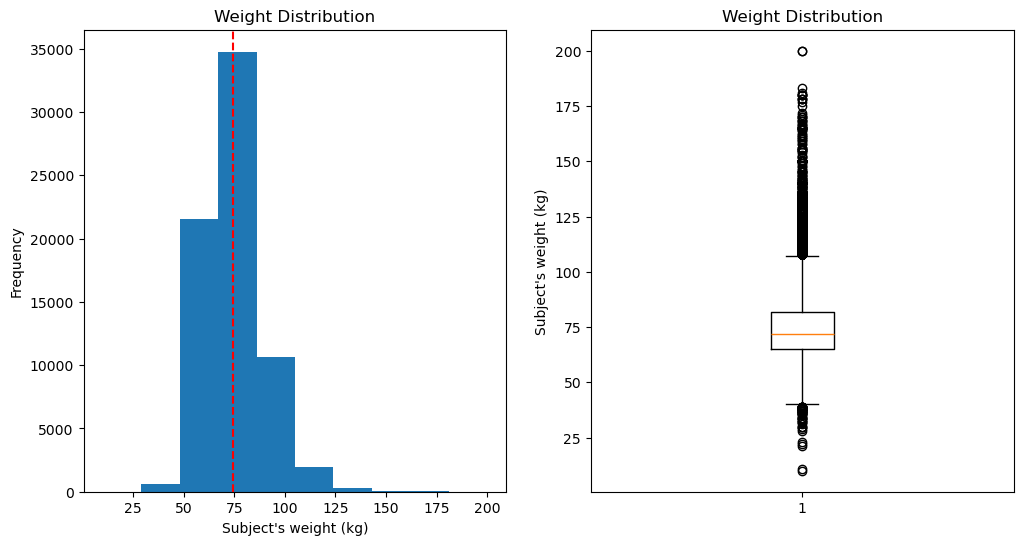

In [175]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax[0].hist(heart_df["weight"])
ax[0].axvline(x=heart_df['weight'].mean(), color = 'red', linestyle = '--', linewidth = 1.5)
ax[0].set_xlabel("Subject's weight (kg)")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Weight Distribution")


ax[1].boxplot(heart_df['weight'])
ax[1].set_ylabel("Subject's weight (kg)")
ax[1].set_title("Weight Distribution")

plt.show()

Also it seems like there is an outlier at 200 kgs. Lets see it in detail. 


In [139]:
heart_df[heart_df['weight'] == 200]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
435,618,46,1,186,200.0,130,70,1,1,False,False,False,False
50413,71945,41,2,180,200.0,150,90,1,1,False,False,True,True


#### ap_hi (Subject's Systolic blood pressure)

<div class="alert alert-block alert-warning">
Systolic blood pressure is the pressure exerted on the walls of arteries when the heart contracts and pumps blood out into the body. It is the top number in a blood pressure reading. For example, in a reading of 120/80 mmHg, 120 represents the systolic pressure. It indicates how much pressure your blood is exerting against your artery walls when the heart beats. A normal systolic blood pressure is typically less than 120 mmHg. Higher readings can indicate hypertension (high blood pressure).
</div>

In [140]:
print(f"Statistical summary for the vairable ap_hi:\n{heart_df['ap_hi'].describe()}\n")

ap_hi_quantiles = heart_df['ap_hi'].quantile([0.0, 0.25, 0.50, 0.75, 0.90, 0.99, 1.0])

print(f"Quantiles for the variable ap_hi:\n{ap_hi_quantiles}")

Statistical summary for the vairable ap_hi:
count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

Quantiles for the variable ap_hi:
0.00     -150.0
0.25      120.0
0.50      120.0
0.75      140.0
0.90      150.0
0.99      180.0
1.00    16020.0
Name: ap_hi, dtype: float64


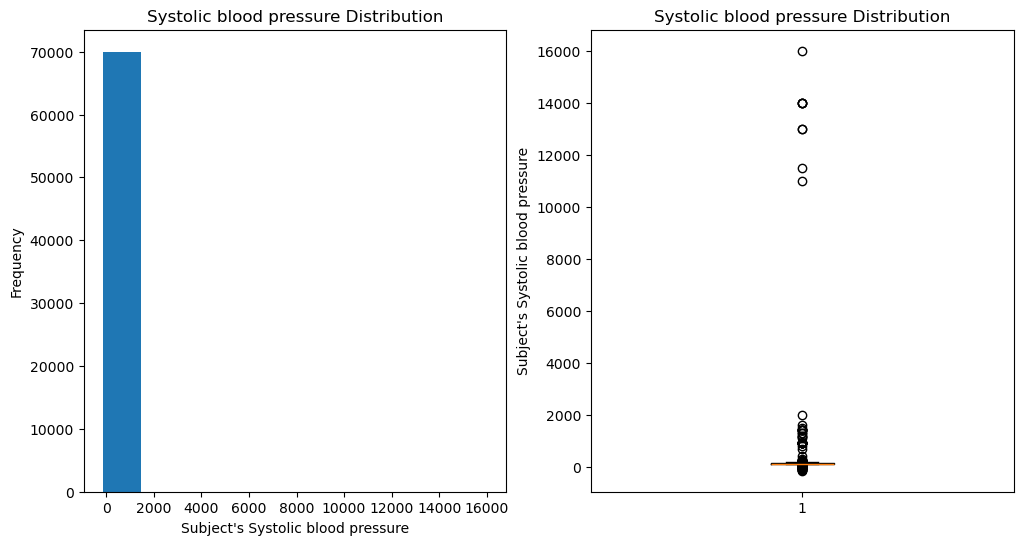

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax[0].hist(heart_df["ap_hi"])
ax[0].set_xlabel("Subject's Systolic blood pressure")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Systolic blood pressure Distribution")


ax[1].boxplot(heart_df['ap_hi'])
ax[1].set_ylabel("Subject's Systolic blood pressure")
ax[1].set_title("Systolic blood pressure Distribution")

plt.show()

Both these graphs look odd, it seems like there are some outliers that may be causing this. Let's draw the graphs without the outliers 

<div style=" color:white; background-color: red; padding: 8px;">

A systolic blood pressure reading of 1000 mmHg is extremely abnormal and not physiologically possible in a human. Such a value would suggest a malfunction in the measurement equipment or a data entry error. Normal systolic blood pressure ranges from around 90 to 120 mmHg. 

Also it is not possible to have a negative blood pressure reading. Blood pressure measures the force exerted by circulating blood on the walls of the arteries, and this force cannot be negative. A negative reading would indicate a malfunction in the equipment or an error in the measurement process
</div>

In [169]:
# adjust the systolic blood pressure to under 200.

ap_hi_adjusted = heart_df[(heart_df["ap_hi"]<200) & (heart_df["ap_hi"]>25)]
ap_hi_adjusted

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,False,False,True,False
1,1,55,1,156,85.0,140,90,3,1,False,False,True,True
2,2,52,1,165,64.0,130,70,3,1,False,False,False,True
3,3,48,2,169,82.0,150,100,1,1,False,False,True,True
4,4,48,1,156,56.0,100,60,1,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,True,False,True,False
69996,99995,62,1,158,126.0,140,90,2,2,False,False,True,True
69997,99996,52,2,183,105.0,180,90,3,1,False,True,False,True
69998,99998,61,1,163,72.0,135,80,1,2,False,False,False,True


In [180]:
print(f"Statistical summary for the vairable ap_hi:\n{ap_hi_adjusted['ap_hi'].describe()}\n")

ap_hi_quantiles = ap_hi_adjusted['ap_hi'].quantile([0.0, 0.25, 0.50, 0.75, 0.90, 0.99, 1.0])

print(f"Quantiles for the variable ap_hi:\n{ap_hi_quantiles}")

Statistical summary for the vairable ap_hi:
count    69601.000000
mean       126.807115
std         16.651871
min         60.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        199.000000
Name: ap_hi, dtype: float64

Quantiles for the variable ap_hi:
0.00     60.0
0.25    120.0
0.50    120.0
0.75    140.0
0.90    150.0
0.99    180.0
1.00    199.0
Name: ap_hi, dtype: float64


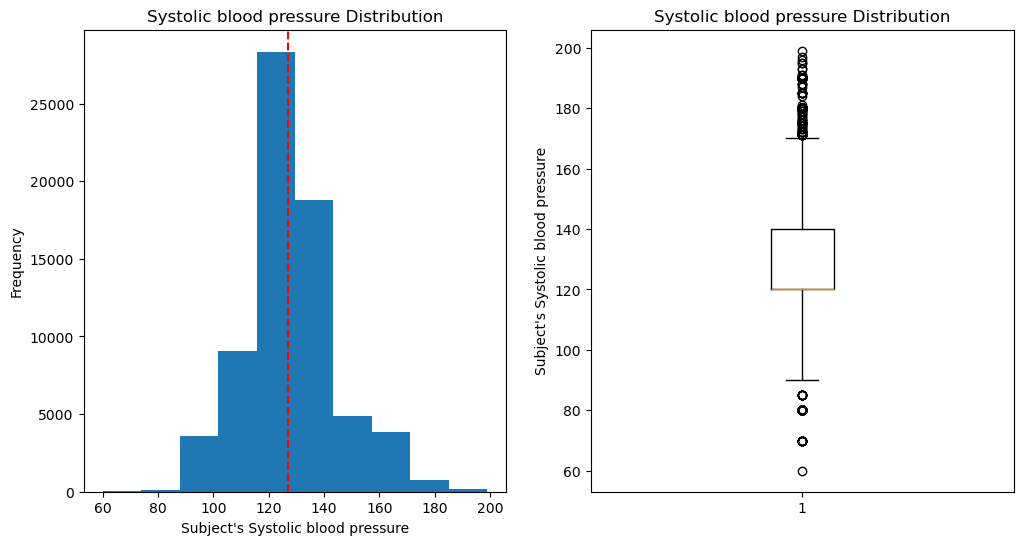

In [177]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax[0].hist(ap_hi_adjusted["ap_hi"])
ax[0].set_xlabel("Subject's Systolic blood pressure")
ax[0].axvline(x=ap_hi_adjusted['ap_hi'].mean(), color = 'red', linestyle = '--', linewidth = 1.5)
ax[0].set_ylabel("Frequency")
ax[0].set_title("Systolic blood pressure Distribution")


ax[1].boxplot(ap_hi_adjusted['ap_hi'])
ax[1].set_ylabel("Subject's Systolic blood pressure")
ax[1].set_title("Systolic blood pressure Distribution")

plt.show()

<div style=" color:white; background-color: red; padding: 8px;">

Normal systolic blood pressure typically ranges from around 90 to 120 mmHg. 

Readings below this can indicate hypotension (low blood pressure), which can be dangerous if it is very low or persistent.

Readings above this can indicate hypertension (high blood pressure). A hypertensive crisis is usually defined as a systolic reading of 180 mmHg or higher.

</div>

##### ap_lo (Diastolic blood pressure)

<div class = "alert alert-block alert-warning">
Diastolic blood pressure is the pressure in the arteries when the heart is at rest between beats, specifically during the diastolic phase of the cardiac cycle. It represents the lowest pressure in the arteries when the heart muscle is relaxed and filling with blood. In a blood pressure reading, diastolic pressure is the lower number. For example, in a reading of 120/80 mmHg, 80 mmHg represents the diastolic pressure.

Normal diastolic blood pressure ranges from around 60 to 80 mmHg. Readings below this can indicate hypotension, while readings above can indicate hypertension.

</div>

In [189]:
# Using the adjusted ap_hi we that there are also outliers in this data. 

print(f"Statistical summary for the vairable ap_lo:\n{ap_hi_adjusted['ap_lo'].describe()}\n")

ap_lo_quantiles = ap_hi_adjusted['ap_lo'].quantile([0.0, 0.25, 0.50, 0.75, 0.90, 0.99, 1.0])

print(f"Quantiles for the variable ap_lo:\n{ap_lo_quantiles}")

Statistical summary for the vairable ap_lo:
count    69601.000000
mean        96.138518
std        183.339133
min          0.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      10000.000000
Name: ap_lo, dtype: float64

Quantiles for the variable ap_lo:
0.00        0.0
0.25       80.0
0.50       80.0
0.75       90.0
0.90       90.0
0.99     1000.0
1.00    10000.0
Name: ap_lo, dtype: float64


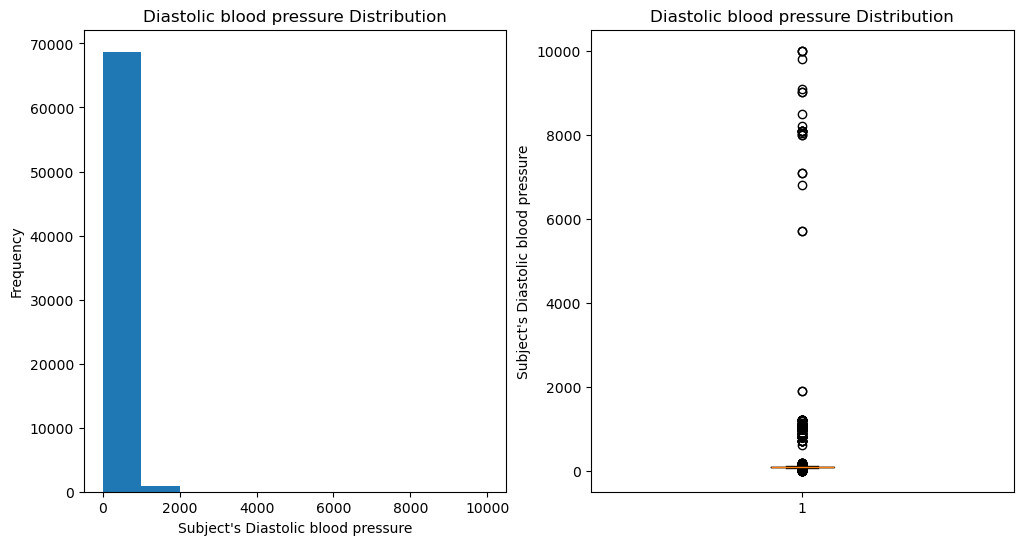

In [190]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax[0].hist(ap_hi_adjusted["ap_lo"])
ax[0].set_xlabel("Subject's Diastolic blood pressure")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Diastolic blood pressure Distribution")


ax[1].boxplot(ap_hi_adjusted['ap_lo'])
ax[1].set_ylabel("Subject's Diastolic blood pressure")
ax[1].set_title("Diastolic blood pressure Distribution")

plt.show()

<div style=" color:white; background-color: red; padding: 8px;">

A diastolic blood pressure reading of 1000 mmHg is extremely abnormal and not physiologically possible in a human. Such a value would suggest a malfunction in the measurement equipment or a data entry error. Normal diastolic blood pressure ranges from around 60 to 80 mmHg. 

Also it is not possible to have a negative reading for diastolic blood pressure. Blood pressure measurements, including diastolic pressure, are always positive values. Negative readings would imply a situation where the pressure is below zero, which is not physiologically possible. If a measurement shows a negative value, it indicates an issue with the measurement device or process.
</div>

In [204]:
adjusted_df = ap_hi_adjusted[(ap_hi_adjusted["ap_lo"]>30) & (ap_hi_adjusted["ap_lo"]<90)]
adjusted_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,False,False,True,False
2,2,52,1,165,64.0,130,70,3,1,False,False,False,True
4,4,48,1,156,56.0,100,60,1,1,False,False,False,False
5,8,60,1,151,67.0,120,80,2,2,False,False,False,False
6,9,61,1,157,93.0,130,80,3,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69990,99986,41,1,168,72.0,110,70,1,1,False,False,True,True
69994,99992,58,1,165,80.0,150,80,1,1,False,False,True,True
69995,99993,53,2,168,76.0,120,80,1,1,True,False,True,False
69998,99998,61,1,163,72.0,135,80,1,2,False,False,False,True


In [205]:
# after adjusting for the right value ranges - Diastolic blood pressure  

print(f"Statistical summary for the vairable ap_lo:\n{adjusted_df['ap_lo'].describe()}\n")

ap_lo_quantiles = adjusted_df['ap_lo'].quantile([0.0, 0.25, 0.50, 0.75, 0.90, 0.99, 1.0])

print(f"Quantiles for the variable ap_lo:\n{ap_lo_quantiles}")

Statistical summary for the vairable ap_lo:
count    49353.000000
mean        76.716917
std          5.964204
min         40.000000
25%         70.000000
50%         80.000000
75%         80.000000
max         89.000000
Name: ap_lo, dtype: float64

Quantiles for the variable ap_lo:
0.00    40.0
0.25    70.0
0.50    80.0
0.75    80.0
0.90    80.0
0.99    84.0
1.00    89.0
Name: ap_lo, dtype: float64


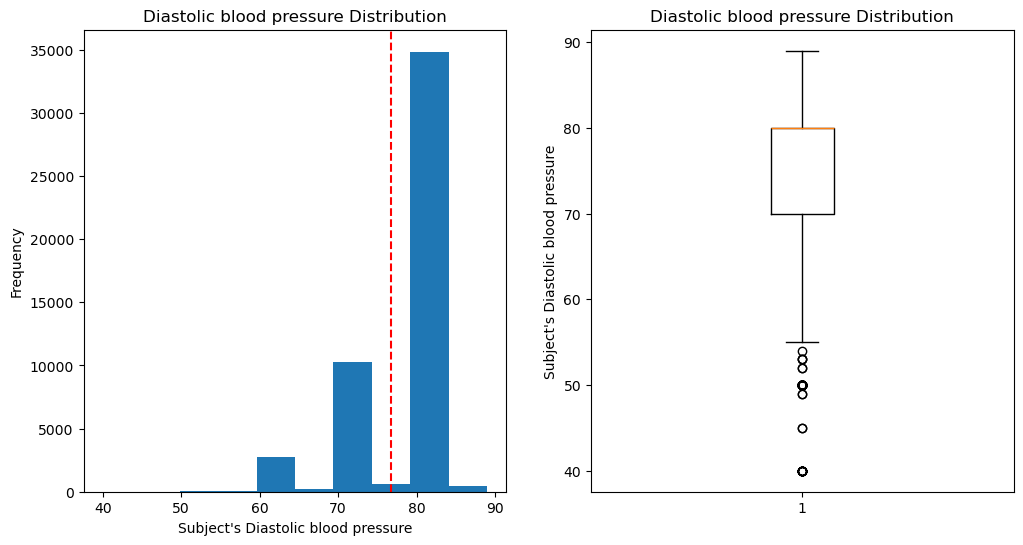

In [206]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax[0].hist(adjusted_df["ap_lo"])
ax[0].set_xlabel("Subject's Diastolic blood pressure")
ax[0].axvline(x=adjusted_df['ap_lo'].mean(), color = 'red', linestyle = '--', linewidth = 1.5)
ax[0].set_ylabel("Frequency")
ax[0].set_title("Diastolic blood pressure Distribution")


ax[1].boxplot(adjusted_df['ap_lo'])
ax[1].set_ylabel("Subject's Diastolic blood pressure")
ax[1].set_title("Diastolic blood pressure Distribution")

plt.show()



#### ap_hi (Diastolic blood pressure) 

Adjusted according to what is counted normal

In [207]:
# do the same for ap_hi

print(f"Statistical summary for the vairable ap_hi:\n{adjusted_df['ap_hi'].describe()}\n")

ap_hi_quantiles = adjusted_df['ap_hi'].quantile([0.0, 0.25, 0.50, 0.75, 0.90, 0.99, 1.0])

print(f"Quantiles for the variable ap_hi:\n{ap_hi_quantiles}")


Statistical summary for the vairable ap_hi:
count    49353.000000
mean       119.963791
std         11.597066
min         60.000000
25%        116.000000
50%        120.000000
75%        120.000000
max        195.000000
Name: ap_hi, dtype: float64

Quantiles for the variable ap_hi:
0.00     60.0
0.25    116.0
0.50    120.0
0.75    120.0
0.90    130.0
0.99    160.0
1.00    195.0
Name: ap_hi, dtype: float64


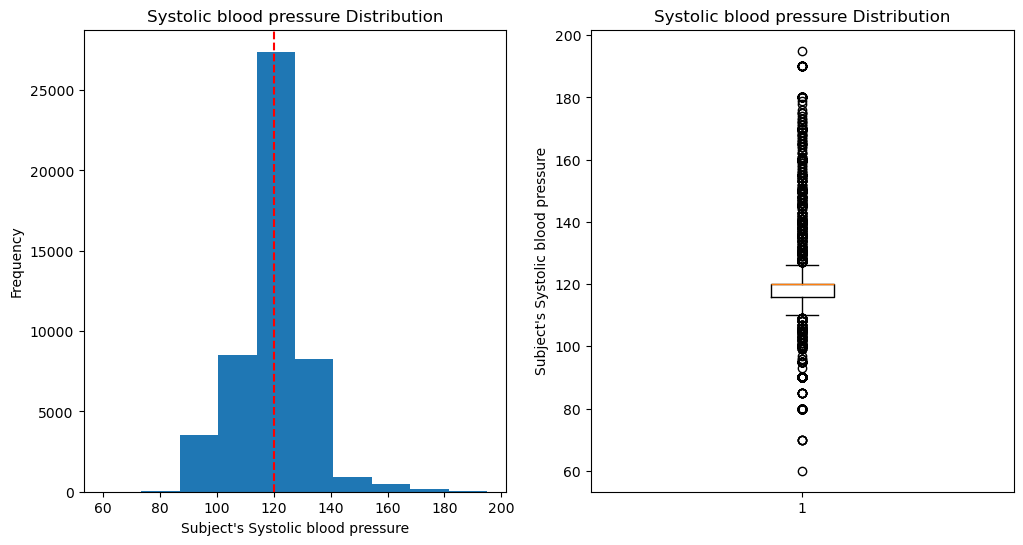

In [208]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax[0].hist(adjusted_df["ap_hi"])
ax[0].set_xlabel("Subject's Systolic blood pressure")
ax[0].axvline(x=adjusted_df['ap_hi'].mean(), color = 'red', linestyle = '--', linewidth = 1.5)
ax[0].set_ylabel("Frequency")
ax[0].set_title("Systolic blood pressure Distribution")


ax[1].boxplot(adjusted_df['ap_hi'])
ax[1].set_ylabel("Subject's Systolic blood pressure")
ax[1].set_title("Systolic blood pressure Distribution")

plt.show()